In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/force2020_data_unsupervised_learning.csv', index_col='DEPTH_MD')

In [28]:
df.dropna(inplace=True)

df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085
...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836


In [29]:
SCALER = StandardScaler()

df[['RHOB_T', 'GR_T', 'NPHI_T', 'PEF_T', 'DTC_T']] = SCALER.fit_transform(df[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])

In [60]:
def optimize_kmeans(df, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

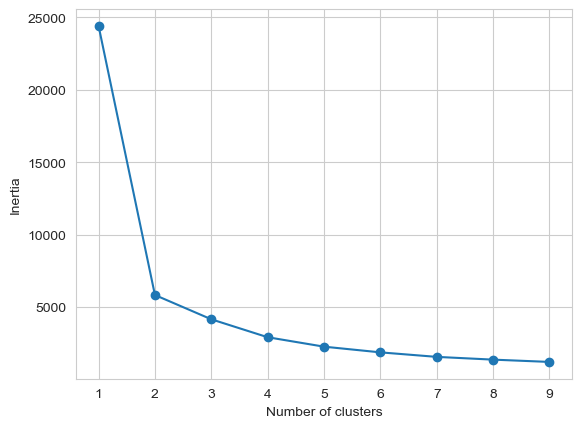

In [61]:
optimize_kmeans(df[['RHOB_T', 'NPHI_T']], 10)

In [40]:
kmeans = KMeans(n_clusters=2, n_init=10)

In [41]:
kmeans.fit(df[['RHOB_T', 'NPHI_T']])

KMeans(n_clusters=2, n_init=10)

In [43]:
df['kmean_2'] = kmeans.labels_

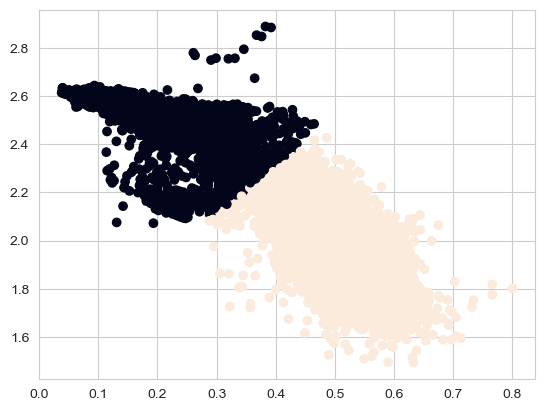

In [65]:
plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmean_2'], label='NPHI vs RHOB')
plt.show()
